In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

## Setting the seeds for reproducibility

In [3]:
# Seed value
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [4]:
cwd = os.getcwd()

In [5]:
# you dont need this on your machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Creating pipeline

In [6]:
BATCH_SIZE = 32

### Creating train tf.data.dataset

In [7]:
cwd = os.getcwd()
train_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/6_5000/train_6_5000.csv'
train_df = pd.read_csv(train_file_path)

In [8]:
## converting the labels into unique integers
train_df['label'] = train_df.label.astype('category').cat.codes

In [9]:
## train_3_half.csv
train_labels = train_df.pop('label')

In [10]:
train_df = train_df / 255.0

In [11]:
train_df.head()

,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,byte10,...,byte1471,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480
0,0.003922,0.733333,0.956863,0.454902,0.619608,0.980392,0.101961,0.717647,0.670588,0.360784,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003922,0.733333,0.611765,0.086275,0.349020,0.666667,0.996078,0.015686,0.537255,0.752941,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003922,0.733333,0.925490,0.403922,0.905882,0.360784,0.411765,0.403922,0.694118,0.760784,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003922,0.733333,0.733333,0.270588,0.635294,0.913725,0.223529,0.662745,0.313725,0.666667,...,0.011765,0.682353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.521569,0.054902,0.003922,0.733333,0.482353,0.215686,0.960784,0.772549,0.337255,0.588235,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values, train_labels.values))

In [13]:
## Just a quick test
for feat, targ in train_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [0.00392157 0.73333333 0.95686275 ... 0.         0.         0.        ], Target: 1
Features: [0.00392157 0.73333333 0.61176471 ... 0.         0.         0.        ], Target: 5
Features: [0.00392157 0.73333333 0.9254902  ... 0.         0.         0.        ], Target: 5
Features: [0.00392157 0.73333333 0.73333333 ... 0.         0.         0.        ], Target: 5
Features: [0.52156863 0.05490196 0.00392157 ... 0.         0.         0.        ], Target: 1


In [14]:
train_dataset = train_dataset.shuffle(len(train_df), seed=seed_value).batch(BATCH_SIZE)

## Creating validation tf.data.dataset

In [15]:
validation_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/6_5000/val_6_5000.csv'
validation_df = pd.read_csv(validation_file_path)

In [16]:
## converting the labels into unique integers
validation_df['label'] = validation_df.label.astype('category').cat.codes

In [17]:
## train_3_half.csv
validation_labels = validation_df.pop('label')

In [18]:
validation_df = validation_df / 255.0

In [19]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_df.values, validation_labels.values))

In [20]:
## Just a quick test
for feat, targ in validation_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [0.74901961 0.51372549 0.         ... 0.         0.         0.        ], Target: 0
Features: [0.         0.31372549 0.76078431 ... 0.         0.         0.        ], Target: 3
Features: [0.         0.31372549 0.76078431 ... 0.         0.         0.        ], Target: 3
Features: [0.00392157 0.73333333 0.75294118 ... 0.         0.         0.        ], Target: 1
Features: [0.00392157 0.73333333 0.95686275 ... 0.         0.         0.        ], Target: 1


In [21]:
validation_dataset = validation_dataset.shuffle(len(validation_df), seed=seed_value).batch(BATCH_SIZE)

### Creating test tf.data.dataset

In [22]:
test_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/6_5000/test_6_5000.csv'
test_df = pd.read_csv(test_file_path)

In [23]:
number_of_test_obs = test_df.shape[0]

In [24]:
## converting the labels into unique integers
test_df['label'] = test_df.label.astype('category').cat.codes

In [25]:
## test_3_half.csv
test_labels = test_df.pop('label')

In [26]:
test_df = test_df / 255.0

In [27]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values, test_labels.values))

In [28]:
## Just a quick test
for feat, targ in test_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [0.00392157 0.73333333 0.9372549  ... 0.         0.         0.        ], Target: 5
Features: [0.83529412 0.34509804 0.01568627 ... 0.         0.         0.        ], Target: 0
Features: [0.72156863 0.3254902  0.         ... 0.73333333 0.8        0.7254902 ], Target: 0
Features: [0.78823529 0.68235294 0.00392157 ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.73333333 ... 0.         0.         0.        ], Target: 5


In [29]:
test_dataset = test_dataset.shuffle(len(test_df), seed=seed_value).batch(BATCH_SIZE)

## Create and train the NN

In [30]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(6)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [31]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=10, validation_data = validation_dataset)

Train for 600 steps, validate for 150 steps
Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 0.9162 - accuracy: 0.6360 - val_loss: 0.6535 - val_accuracy: 0.7375
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.5567 - accuracy: 0.7932 - val_loss: 0.5522 - val_accuracy: 0.7948
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.4560 - accuracy: 0.8326 - val_loss: 0.5511 - val_accuracy: 0.7958
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3815 - accuracy: 0.8608 - val_loss: 0.4807 - val_accuracy: 0.8277
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3191 - accuracy: 0.8855 - val_loss: 0.4912 - val_accuracy: 0.8235
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2775 - accuracy: 0.9017 - val_loss: 0.4563 - val_accuracy: 0.8448
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2331 - accuracy: 0.91

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  148100    
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dense_2 (Dense)              multiple                  10100     
_________________________________________________________________
dense_3 (Dense)              multiple                  606       
Total params: 168,906
Trainable params: 168,906
Non-trainable params: 0
_________________________________________________________________


## Plotting convergence

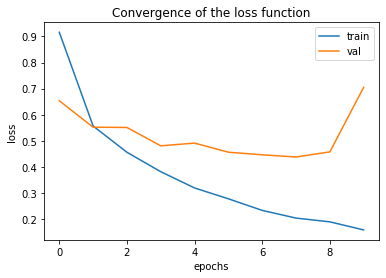

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Convergence of the loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])

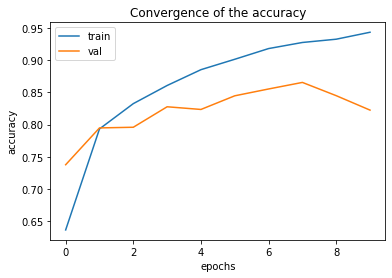

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Convergence of the accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])

## Evaluate the model on the test set

In [35]:
test_result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, test_result))

188/188 [==============================] - 1s 5ms/step - loss: 0.6740 - accuracy: 0.8262


{'loss': 0.6739926918389949, 'accuracy': 0.8261667}

# Evaluating resource consumption
We will be evaluating the computational efficiency of a model by calculating amount of memory and time needed to make a prediction.

## Creating a sample packet

In [36]:
sample_packet = []
for i in range(1480):
    sample_packet.append(random.random())

## Memory

In [37]:
import tracemalloc

In [38]:
tracemalloc.start()

y_pred_test = model.predict(tf.expand_dims(sample_packet, 0))

current, peak = tracemalloc.get_traced_memory()
current = (current / 10**6)
peak = (peak / 10**6)
print("The amount of memory needed to make a single preiction")
print(f"Current memory usage is {current}MB; Peak was {peak}MB")
tracemalloc.stop()

The amount of memory needed to make a single preiction
Current memory usage is 0.443665MB; Peak was 0.455901MB


## Time


In [39]:
import time

start = time.time()
y_pred_test = model.predict(tf.expand_dims(sample_packet, 0))
end = time.time()
print("The time taken to make a prediction: {}".format((end - start)))

The time taken to make a prediction: 0.0535275936126709
